In [1]:
# !pip install TCT

Link to the TCT document: https://ncatstranslator.github.io/Translator_component_toolkit/


In [8]:

from TCT import translator_metakg
from TCT import translator_kpinfo
import matplotlib.pyplot as plt
import networkx as nx

In [14]:
def load_translator_resources():
    """
    Load the necessary resources for the Translator.
    """
    Translator_KP_info,APInames= translator_kpinfo.get_translator_kp_info()
    metaKG = translator_metakg.get_KP_metadata(APInames) 
    APInames,metaKG = translator_metakg.add_plover_API(APInames, metaKG)
    return  APInames, metaKG, Translator_KP_info

APInames, metaKG, Translator_KP_info= load_translator_resources()

In [6]:
# Preparation 
# Step1: List all the APIs in the translator system
Translator_KP_info,APInames= translator_kpinfo.get_translator_kp_info()
print(len(Translator_KP_info))
# Step 2: Get metaKG and all predicates from Translator APIs through the SmartAPI system
metaKG = translator_metakg.get_KP_metadata(APInames) 
print(metaKG.shape)
# Add metaKG from Plover API based KG resources
APInames,metaKG = translator_metakg.add_plover_API(APInames, metaKG)
print(metaKG.shape)
# Step 3: list metaKG information
All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))
print(len(API_withMetaKG))
print(len(All_predicates))
print(len(All_categories))

# ARA list
API_withMetaKG = set(metaKG['API'])
print("ARA list:", set(APInames.keys()) - API_withMetaKG)

53
(10580, 5)
(22129, 5)
42
184
108
ARA list: {'Workflow-runner(Trapi v1.5.0)', 'Sri-answer-appraiser(Trapi v1.5.0)', 'mediKanren', 'Cqs(Trapi v1.5.0)', 'Autonomous Relay System (ARS) TRAPI', 'OpenPredict API', 'Aragorn(Trapi v1.5.0)', 'Sri-node-normalizer(Trapi v1.5.0)', 'Answer-coalesce(Trapi v1.5.0)', 'ARAX Translator Reasoner - TRAPI 1.5.0'}


In [21]:
APInames

{'CATRAX BigGIM DrugResponse Performance Phase KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/BigGIM_DrugResponse_PerformancePhase/query',
 'Clinical Trials KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/ctkp/query',
 'imProving Agent for TRAPI 1.5': 'https://ia.transltr.io/api/v1.5/query/',
 'mediKanren': 'https://medikanren-trapi.transltr.io/query/',
 'Drug Approvals KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/dakp/query',
 'CATRAX Pharmacogenomics KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/PharmacogenomicsKG/query',
 'ARAX Translator Reasoner - TRAPI 1.5.0': 'https://arax.transltr.io/api/arax/v1.4/query/',
 'Text Mined Cooccurrence API': 'https://cooccurrence.ci.transltr.io/query/',
 'Service Provider TRAPI': 'https://bte.transltr.io/v1/team/Service%20Provider/query/',
 'Connections Hypothesis Provider API': 'https://chp-api.transltr.io/query/',
 'Gene-List Network Enrichment Analysis': 'https://translator.broadinstitute.org/gelinea-trapi/v1.5/query/',
 'COHD 

In [15]:
metaKG

,API,Predicate,Subject,Object,URL
0,imProving Agent for TRAPI 1.5,biolink:has_real_world_evidence_of_association...,biolink:ChemicalEntity,biolink:Disease,https://ia.transltr.io/api/v1.5/query/
1,imProving Agent for TRAPI 1.5,biolink:entity_regulates_entity,biolink:ChemicalEntity,biolink:Gene,https://ia.transltr.io/api/v1.5/query/
2,imProving Agent for TRAPI 1.5,biolink:has_side_effect,biolink:ChemicalEntity,biolink:PhenotypicFeature,https://ia.transltr.io/api/v1.5/query/
3,imProving Agent for TRAPI 1.5,biolink:has_real_world_evidence_of_association...,biolink:Disease,biolink:Disease,https://ia.transltr.io/api/v1.5/query/
4,imProving Agent for TRAPI 1.5,biolink:has_food_component,biolink:Food,biolink:ChemicalEntity,https://ia.transltr.io/api/v1.5/query/
...,...,...,...,...,...
21946,RTX KG2 - TRAPI 1.5.0,biolink:applied_to_treat,biolink:NamedThing,biolink:Disease,https://kg2cploverdb.ci.transltr.io/kg2c/query
21947,RTX KG2 - TRAPI 1.5.0,biolink:applied_to_treat,biolink:NamedThing,biolink:PhenotypicFeature,https://kg2cploverdb.ci.transltr.io/kg2c/query
21948,RTX KG2 - TRAPI 1.5.0,biolink:applied_to_treat,biolink:NamedThing,biolink:BehavioralFeature,https://kg2cploverdb.ci.transltr.io/kg2c/query
21949,RTX KG2 - TRAPI 1.5.0,biolink:applied_to_treat,biolink:ChemicalEntity,biolink:BehavioralFeature,https://kg2cploverdb.ci.transltr.io/kg2c/query


Understand the metaKG in biolink: https://biolink.github.io/biolink-model/categories.html

In [24]:
# find the KG in one individual API (optional)
metaKG.loc[metaKG['API'] == 'Drug Approvals KP - TRAPI 1.5.0',['API','Predicate','Subject','Object']].drop_duplicates()

,API,Predicate,Subject,Object
10675,Drug Approvals KP - TRAPI 1.5.0,biolink:applied_to_treat,biolink:SmallMolecule,biolink:Disease
10676,Drug Approvals KP - TRAPI 1.5.0,biolink:treats,biolink:SmallMolecule,biolink:Disease
10677,Drug Approvals KP - TRAPI 1.5.0,biolink:treats,biolink:ChemicalEntity,biolink:Disease
10678,Drug Approvals KP - TRAPI 1.5.0,biolink:treats,biolink:SmallMolecule,biolink:PhenotypicFeature
10679,Drug Approvals KP - TRAPI 1.5.0,biolink:applied_to_treat,biolink:ChemicalEntity,biolink:PhenotypicFeature
10680,Drug Approvals KP - TRAPI 1.5.0,biolink:treats,biolink:ChemicalEntity,biolink:PhenotypicFeature
10681,Drug Approvals KP - TRAPI 1.5.0,biolink:applied_to_treat,biolink:ChemicalEntity,biolink:Disease
10682,Drug Approvals KP - TRAPI 1.5.0,biolink:applied_to_treat,biolink:SmallMolecule,biolink:PhenotypicFeature
10683,Drug Approvals KP - TRAPI 1.5.0,biolink:applied_to_treat,biolink:MolecularMixture,biolink:Disease
10684,Drug Approvals KP - TRAPI 1.5.0,biolink:treats,biolink:MolecularMixture,biolink:Disease


In [22]:
# find the KG in one individual API (optional)
metaKG.loc[metaKG['API'] == 'MolePro',['API','Predicate','Subject','Object']].drop_duplicates()

,API,Predicate,Subject,Object
2970,MolePro,biolink:location_of,biolink:GrossAnatomicalStructure,biolink:MolecularMixture
2971,MolePro,biolink:has_side_effect,biolink:MolecularMixture,biolink:Behavior
2972,MolePro,biolink:is_active_ingredient_of,biolink:Protein,biolink:SmallMolecule
2973,MolePro,biolink:affected_by,biolink:MacromolecularComplexMixin,biolink:ChemicalEntity
2974,MolePro,biolink:is_assessed_by,biolink:ProteinComplex,biolink:SmallMolecule
...,...,...,...,...
3793,MolePro,biolink:affects,biolink:SmallMolecule,biolink:Gene
3794,MolePro,biolink:affects,biolink:Gene,biolink:SmallMolecule
3795,MolePro,biolink:interacts_with,biolink:Gene,biolink:SmallMolecule
3796,MolePro,biolink:affected_by,biolink:Gene,biolink:SmallMolecule


In [20]:

# find the KG in one individual API (optional)
metaKG.loc[metaKG['API'] == 'RTX KG2 - TRAPI 1.5.0',['API','Predicate','Subject','Object']].drop_duplicates()

,API,Predicate,Subject,Object
11130,RTX KG2 - TRAPI 1.5.0,biolink:close_match,biolink:Drug,biolink:MolecularMixture
11131,RTX KG2 - TRAPI 1.5.0,biolink:close_match,biolink:Drug,biolink:ChemicalEntity
11132,RTX KG2 - TRAPI 1.5.0,biolink:close_match,biolink:Drug,biolink:SmallMolecule
11133,RTX KG2 - TRAPI 1.5.0,biolink:close_match,biolink:Drug,biolink:Drug
11134,RTX KG2 - TRAPI 1.5.0,biolink:close_match,biolink:SmallMolecule,biolink:Drug
...,...,...,...,...
21946,RTX KG2 - TRAPI 1.5.0,biolink:applied_to_treat,biolink:NamedThing,biolink:Disease
21947,RTX KG2 - TRAPI 1.5.0,biolink:applied_to_treat,biolink:NamedThing,biolink:PhenotypicFeature
21948,RTX KG2 - TRAPI 1.5.0,biolink:applied_to_treat,biolink:NamedThing,biolink:BehavioralFeature
21949,RTX KG2 - TRAPI 1.5.0,biolink:applied_to_treat,biolink:ChemicalEntity,biolink:BehavioralFeature


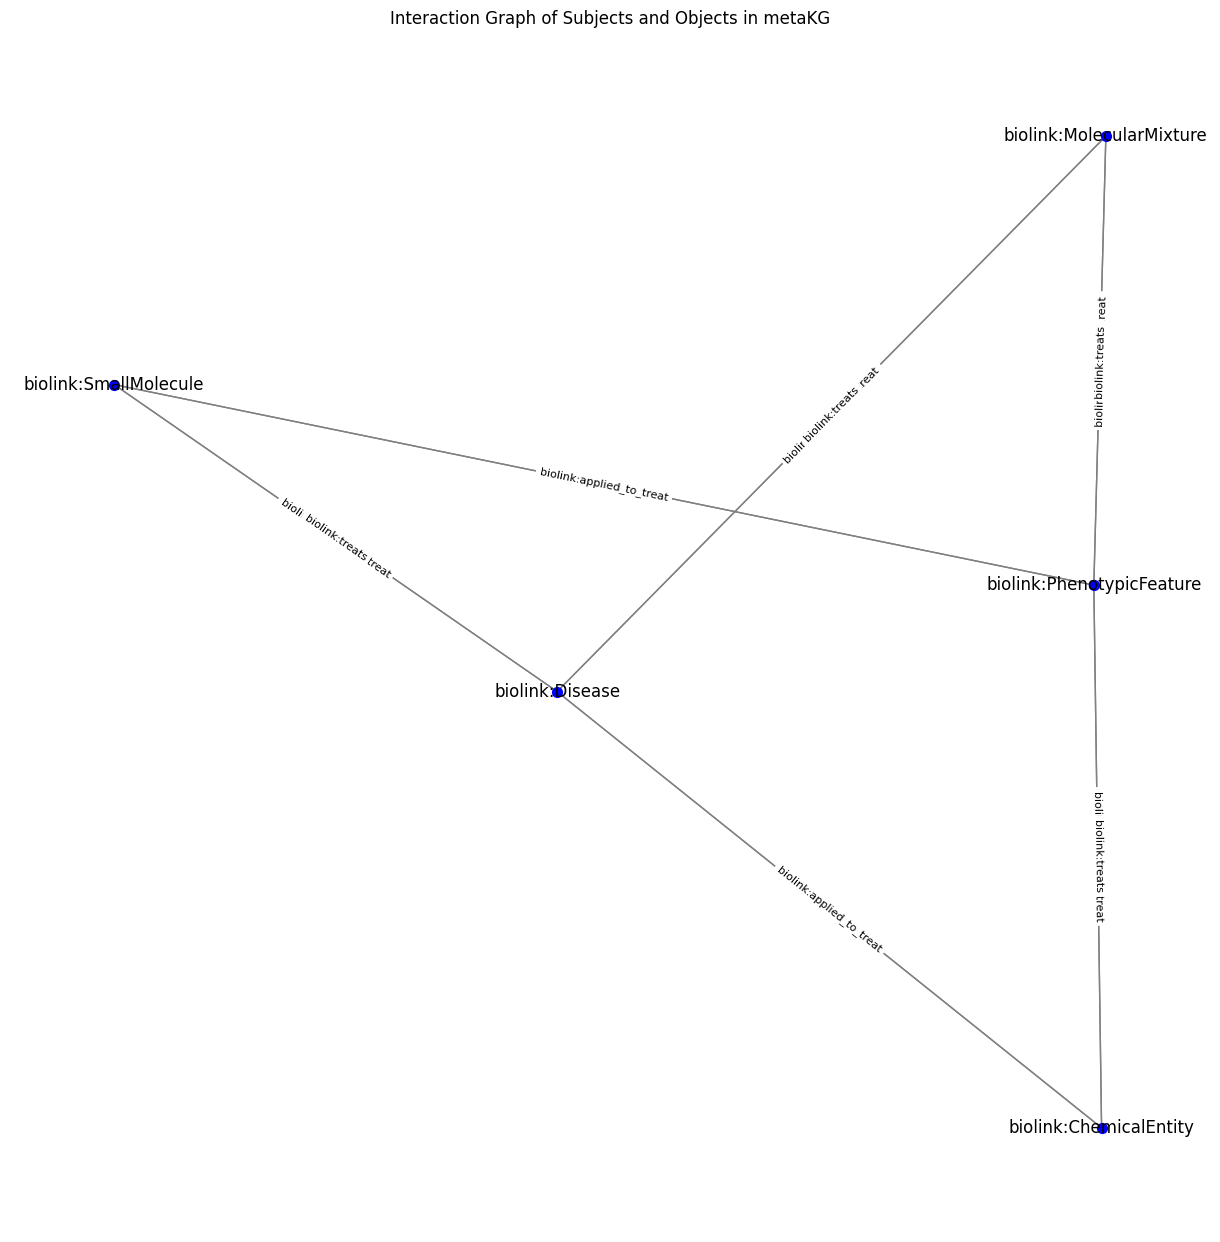

In [26]:
# draw the interaction graph between subject and object in the metaKG using networkx
# first, we need to drop the interactions between subjects and objects that both subjects and objects are the same
#metaKG = metaKG[metaKG['Subject'] != metaKG['Object']]
# second, we need to filter the metaKG to only include the selected categories
#metaKG = metaKG[metaKG['Subject'].isin(selected_categories) | metaKG['Object'].isin(selected_categories)]
selected_KGs = ['Drug Approvals KP - TRAPI 1.5.0'
                ]

metaKG_sele = metaKG[metaKG['API'].isin(selected_KGs)]

# build a multigraph to capture all edges (including duplicates) and their predicates
G = nx.MultiGraph()
for _, row in metaKG_sele.iterrows():
        G.add_edge(row['Subject'], row['Object'], predicate=row['Predicate'])

# layout and draw nodes + edges
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=20)
nx.draw(G, pos,
                with_labels=True,
                node_size=50,
                font_size=12,
                font_color='black',
                node_color='blue',
                edge_color='gray')

# draw edge labels
edge_labels = nx.get_edge_attributes(G, 'predicate')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title('Interaction Graph of Subjects and Objects in metaKG')
plt.show()